# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/week_1/Project_1/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [5]:
print(f'We have {df.shape[0]} rows and {df.shape[1]} columns in this dataset')

We have 1898 rows and 9 columns in this dataset


#### Observations:
Our dataset contains: **1898 Rows and 9 columns**

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [6]:
df.info()# Use info() to print a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
*    The int columns are order_id, customer_id, food_preparation_time and delivery time
*    The categorical columns are related to the restaurant_name, cuisine_type, day_of_the_week and rating.
  *   Something that brought my attention, the rating column it's an object column for , possible, numeric values. I will dig deeper in this column to understand why is considered categorical instead of int
*   We have only 1 float column related to the cost_of_the_order due to the cents
*   At the first sight, seems that we do not have null or empty values in this dataset

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [7]:
# Counting NaN values in the dataset
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

As we saw, we do not have null values in the dataset, but I will check the ratings column.

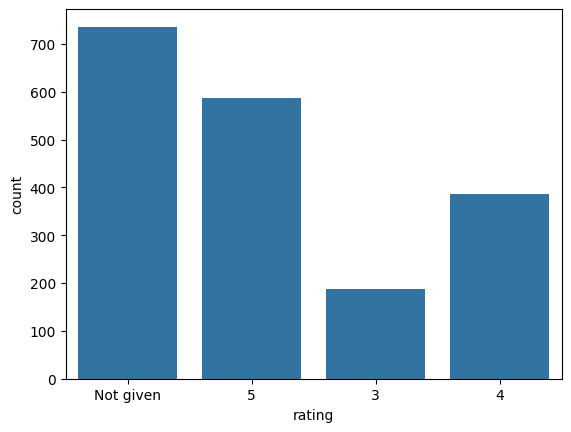

In [8]:
# Checking the different number of rows for each different value on the rating column
sns.countplot(data=df, x='rating');

We have one value in the ratings column as "Not given", this is the reason why the column was imported as object and not as a numeric column.

In [9]:
df.rating.value_counts(normalize = True, dropna = False)

rating
Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: proportion, dtype: float64

#### Observations:
 I did the following actions to validate empty values
*  Based on the information we got from the info() function all the values seems to be available in the data set.
*   I did the count of the possible na values and all the columns return 0
*   For the column that got my attention, rating, I plotted the different values of this column and the majority of them are 'Not Given'.  
*   The percentages of the rating categorical column showed that almost **40%** of the values are "not given', so I think that we cannot consider it as missing data maybe it's that the clients do not provide input to the business on their orders.
<br><br>So, this 40% is something important to consider here, for the following reasons<br>
*   The rating 5 is the most frequent rating, if I used to impute the missing values could introduce bias towards the higher ranking.
*   We could create another column with numeric values and use the global mean or median of the values that are available but we could not capture the correct variability in the data
<br>
For these reasons, I think the best approach is to impute those values with the mean of each cuisine type. In that way, we are passing the mean of only similar types of cusines.





In [10]:
# First, I am going to tranformn the Not given values to Nan, because it will be easier to use for numerica transformations
df['rating_notgiven'] = df['rating'].replace('Not given', np.nan)
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_notgiven
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,3
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,NaN
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,3
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26,5
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26,5


In [11]:
# Second, I am converting the column into a numeric column
df['rating_2'] = pd.to_numeric(df['rating_notgiven'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   rating_notgiven        1162 non-null   object 
 10  rating_2               1162 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 163.2+ KB


OK, now I have a column called rating_2 that is a float column<br>
My next step is to apply a lambda functionto that is able to identify the NaN values, and update them with the mean based on the cuisine_type column

In [12]:
df['rating_numeric'] = df.groupby('cuisine_type')['rating_2'].transform(lambda x: x.fillna(round(x.mean())))
df['rating_numeric'] = df['rating_numeric'].astype(int)


In [13]:
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,rating_notgiven,rating_2,rating_numeric
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,NaN,NaN,4
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,NaN,NaN,4
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5,5.0,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3,3.0,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4,4.0,4
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,3,3.0,3
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,NaN,NaN,4
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,3,3.0,3
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26,5,5.0,5
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26,5,5.0,5


In [14]:
df.drop(columns=['rating_notgiven', 'rating_2'], inplace=True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   rating_numeric         1898 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 148.4+ KB


So, now I have the column called rating_numeric that is a int with the ratings and no empty values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [15]:
df.describe(include='all').T# Write your code here

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0
rating_numeric,1898.0,NaN,NaN,NaN,4.231296,0.61327,3.0,4.0,4.0,5.0,5.0


#### Observations:
I used the column <br>

> food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation

And I am using the `describe(include='all')` function to all the dataframe to see all the statistics for all the columns including the categoricals. For this question of the time that takes to prepare the food once the order is placed

*   Minimum = **20 minutes**
*   Average = **27.37 minutes**
*   Maximum = **35 minutes**



### **Question 5:** How many orders are not rated?

In [16]:
occur = df.groupby(['rating']).size() # Write the code here
print(occur)

rating
3            188
4            386
5            588
Not given    736
dtype: int64


In [17]:
(df['rating'].value_counts(normalize = True)) * 100


rating
Not given    38.777661
5            30.979979
4            20.337197
3             9.905163
Name: proportion, dtype: float64

#### Observations:
The total number of  'Not given' values present in the rating columns are: <br>
**736** that is the **38.77%** of the total amount of records availables in the dataset

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

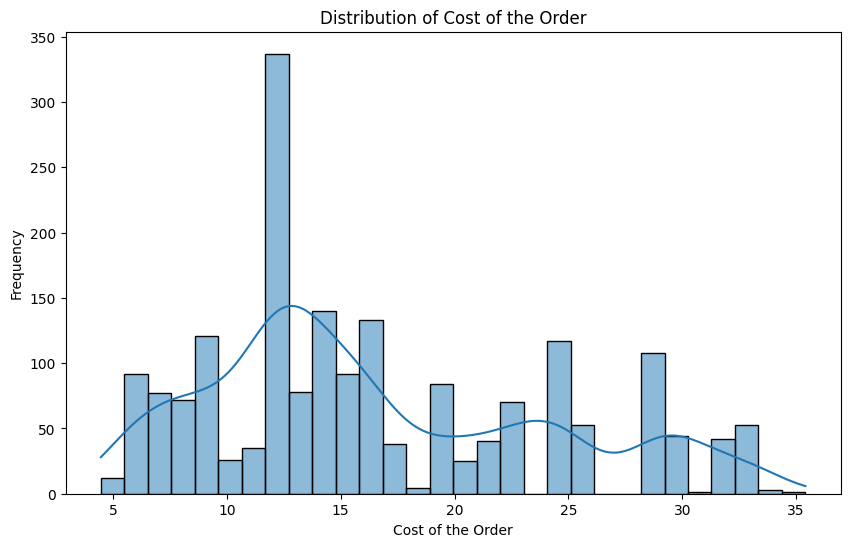

In [18]:
# Histogram for the cost of the orders
plt.figure(figsize=(10, 6))
sns.histplot(df['cost_of_the_order'], bins=30, kde=True)
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.show()

In [19]:
mean_order = df['cost_of_the_order'].mean()
median_order = df['cost_of_the_order'].median()
std_order = df['cost_of_the_order'].std()
skew = (mean_order-median_order)/std_order
mean_order, median_order, std_order, skew

(16.498851422550054, 14.14, 7.48381211004957, 0.31519383275035606)

Observations:<br>
*   Around 13 usd per ticket is cost in which we can see almost 350 orders
*   The mean of the cost of the orders is: **16.5**
*   The median of the cost of the orders is: **14.1**
*   There is no big different between the mean and median
*   Applied the formula (mean-median)/std_dev to identify the skweenes of the plot, the value is **0.31** so the plot is fairly simmetric

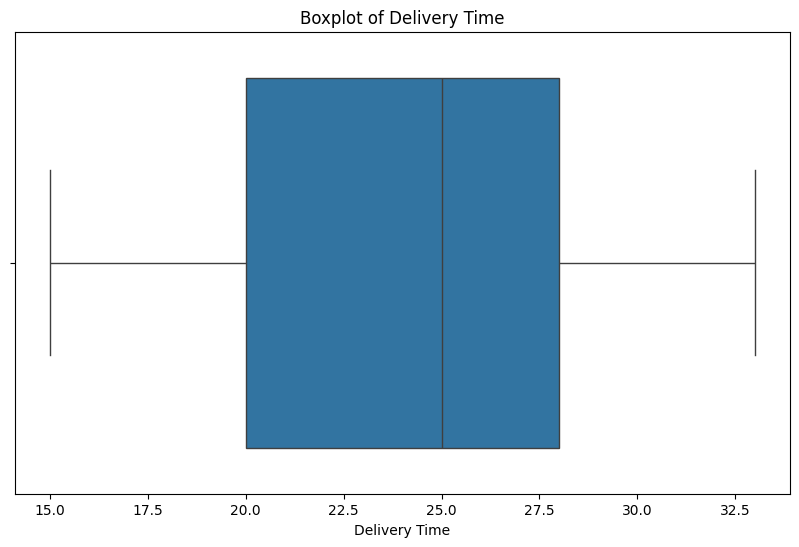

In [20]:
# Let's analize the devilery time variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['delivery_time'])
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time')
plt.show()

Observations
*   We do not have outliers, which is great!! We are not affected by outliers in this feature
*   As we can see in the boxplot, the median time is **25 minutes**
*   Although the median is closer to the Q3, this is not a big concern to consider that the data is skew

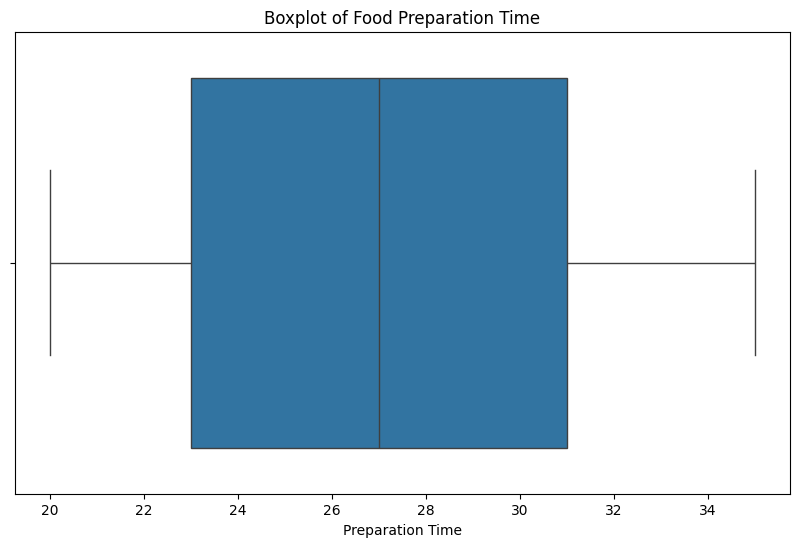

In [21]:
# Let's analize the food preparation time
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['food_preparation_time'])
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Preparation Time')
plt.show()

Observations
Similar to the food_delivery_time feature
*   We do not have outliers
*   The median is centric int he boxplot, so we do not have skew data
*   The median is around **27 minutes*

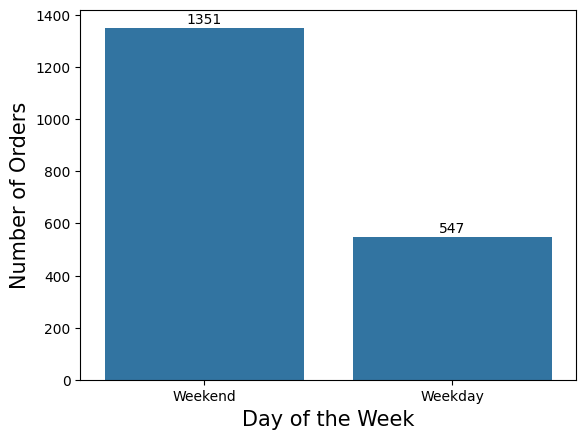

In [22]:
plt.figure()
ax = sns.countplot(data=df, x='day_of_the_week')
plt.xlabel('Day of the Week', size=15)
plt.ylabel('Number of Orders', size=15)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 6),
                textcoords = 'offset points')
plt.show()

In [23]:
wknd = df[df['day_of_the_week']=='Weekend'].value_counts()
print(f'{wknd.shape[0]/df.shape[0]}')
wkdy = df[df['day_of_the_week']=='Weekday'].value_counts()
print(wkdy.shape[0]/df.shape[0])

0.7118018967334035
0.2881981032665964


Observations:

*   There is a considerable difference on the number of orders placed during the weekends versus the weekdays
*   The number of orders during the weekdays is: **547** that represents the **29%** of the total orders
*   The number of orders during the weekends is: **1351** that represents the **71%**of the total orders

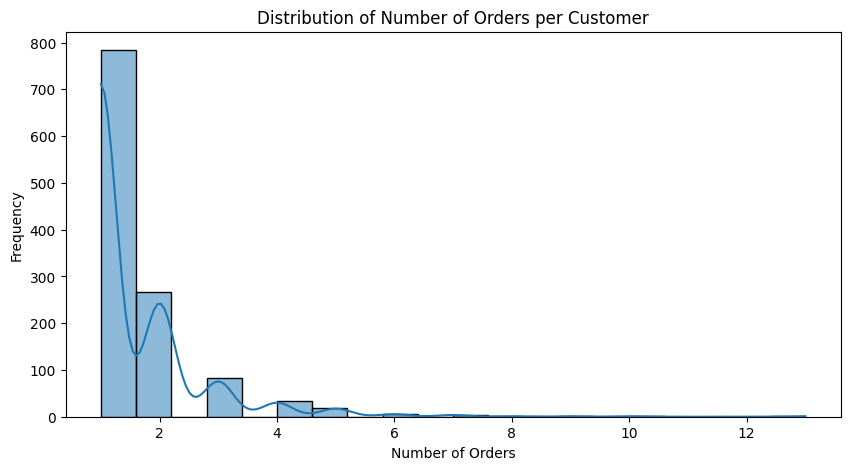

In [24]:
# Calculate the number of orders per customer
order_counts = df['customer_id'].value_counts()

# Plot the histogram of order counts
plt.figure(figsize=(10, 5))
sns.histplot(order_counts, bins=20, kde=True)
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Mean number of orders by customer
print(f'The mean number of orders by customers is: {order_counts.mean()}')
print(f'Unique customers: {round(len(order_counts),2)}')

The mean number of orders by customers is: 1.5816666666666668
Unique customers: 1200


Based on this plot we can see the folllowing behavior:


*   The mean number of orders by customers is: **1.58**
*   In this sample, we have **1,200** unique registered customers



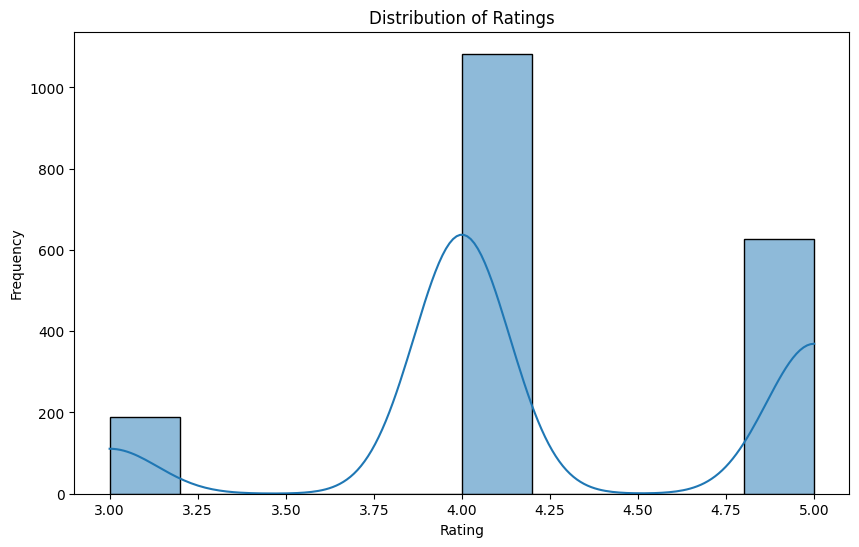

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating_numeric'].dropna(), bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Observations
*   After the imputation of the Not given values by the mean based on the cuisine_type, we can see that the ratings change and this is the new order
**   4 the value most rated
**   5 the second most rated
**   3 is the third most rated

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [27]:
group_by_restaurant = df.groupby('restaurant_name').size()
top5 = group_by_restaurant.sort_values(ascending=False).iloc[:5]
print(top5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
dtype: int64


In [28]:
group_by_sales = df.groupby('restaurant_name')['cost_of_the_order'].sum().reset_index()
sorted_sales = group_by_sales.sort_values(by='cost_of_the_order', ascending=False).iloc[:5]
print(sorted_sales)

               restaurant_name  cost_of_the_order
136                Shake Shack            3579.53
153          The Meatball Shop            2145.21
21           Blue Ribbon Sushi            1903.95
20   Blue Ribbon Fried Chicken            1662.29
109                       Parm            1112.76


In [29]:
total = 0
for index1, row1 in sorted_sales.iterrows():
    meanByRest1 = df[df['restaurant_name']==row1['restaurant_name']]['cost_of_the_order'].mean()
    total = total + meanByRest1
    print(f"Restaurant Name: {row1['restaurant_name']} rating avg: {round(meanByRest1,2)}")

avg_of_top = round(total/5,2)
print(f'Cost of the order of the top Restaurants: {avg_of_top}')

Restaurant Name: Shake Shack rating avg: 16.34
Restaurant Name: The Meatball Shop rating avg: 16.25
Restaurant Name: Blue Ribbon Sushi rating avg: 16.0
Restaurant Name: Blue Ribbon Fried Chicken rating avg: 17.32
Restaurant Name: Parm rating avg: 16.36
Cost of the order of the top Restaurants: 16.46


#### Observations:
The Top 5 restaurants in terms or orders received are:<br><br>
*   Shake Shack: **219 Orders**
*   The Meatball Shop: **132 Orders**
*   Blue Ribbon Sushi: **119 Orders**
*   Blue Ribbon Fried Chicken: **96 Orders**
*   Parm: **68 Orders**

The averace cost of order of these top 5 restaurants is: **16.46**

### **Question 8**: Which is the most popular cuisine on weekends?

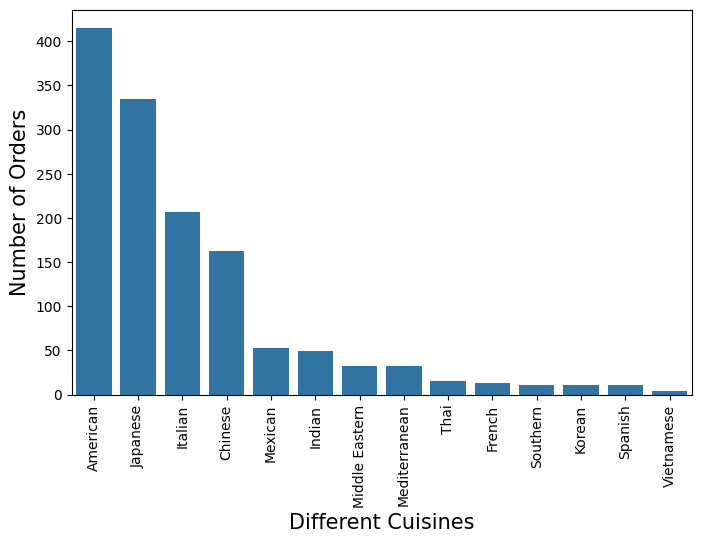

In [30]:
# Write the code here
df_weekends = df[df['day_of_the_week']=='Weekend']
plt.figure(figsize=(8,5))
sns.countplot(data=df_weekends, x='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.xlabel('Different Cuisines', size=15)
plt.ylabel('Number of Orders', size=15)
plt.xticks(rotation=90)
plt.show()

In [31]:
wknd_cuisine = df_weekends.groupby('cuisine_type').size()
ordersbycuisine_wknd = wknd_cuisine.sort_values(ascending=False)
print(ordersbycuisine_wknd)

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
dtype: int64


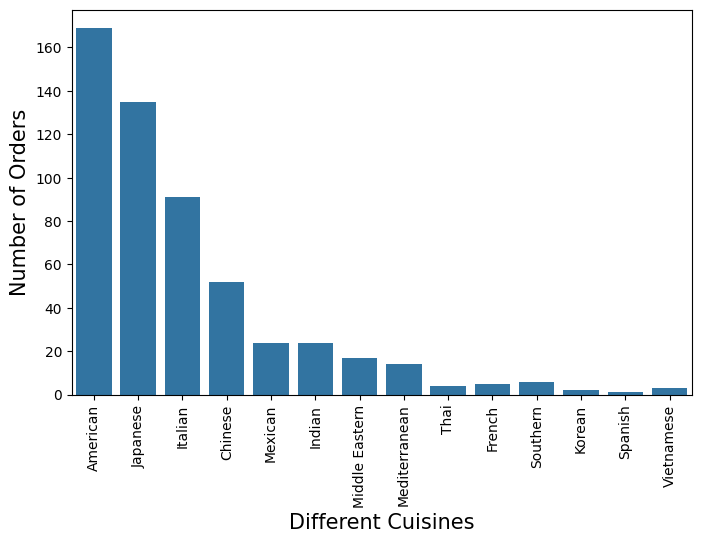

In [32]:
df_weekends = df[df['day_of_the_week']=='Weekday']
plt.figure(figsize=(8,5))
sns.countplot(data=df_weekends, x='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.xlabel('Different Cuisines', size=15)
plt.ylabel('Number of Orders', size=15)
plt.xticks(rotation=90)
plt.show()

#### Observations:
The overall cuisine type that is the top is the American, but filtering by Weekend days only, this trend is the same.<br>
American Cuisine is the Top Cusine Type during weekends with a total of **415 orders**

As we can see in the scond plot, the preference is identical in weekends and weekdays, no difference identify only the amount of orders that is bigger during weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [33]:
# Write the code here
orders_big_20 = df[df['cost_of_the_order'] > 20]
total_percentage_20 = (orders_big_20.shape[0] / df.shape[0]) * 100
print(f'Total number or orders over 20 dollars:{orders_big_20.shape[0]}')
print(f'Total number or orders :{df.shape[0]}')
print(f'The percentage of orders that cost more than 20 dollars is: {total_percentage_20:.2f}%')

Total number or orders over 20 dollars:555
Total number or orders :1898
The percentage of orders that cost more than 20 dollars is: 29.24%


#### Observations:
We have **555 orders** that cost more than 20 Dollars, which means that we have the **29.24%** of all the orders.

### **Question 10**: What is the mean order delivery time?

In [34]:
# Write the code here
overall = df.delivery_time.mean()
del_time_weekends = df[df['day_of_the_week']=='Weekend'].delivery_time.mean()
del_time_weekdays = df[df['day_of_the_week']=='Weekday'].delivery_time.mean()
print(f'Overall delivery time: {round(overall,2)}')
print(f'Mean delivery time during weekdays: {round(del_time_weekdays,2)}')
print(f'Mean delivery time during weekends: {round(del_time_weekends,2)}')


Overall delivery time: 24.16
Mean delivery time during weekdays: 28.34
Mean delivery time during weekends: 22.47


#### Observations:
The mean delivery time is **24.16** minutes<br>
Additionally, we can see that during the weekends the delivery is faster than during weekdays. Aprox a **25%** faster

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [35]:
# Write the code here
group_by_customers = df.groupby('customer_id').size()
top3_customers = group_by_customers.sort_values(ascending=False).iloc[:3]
print(top3_customers)

customer_id
52832    13
47440    10
83287     9
dtype: int64


#### Observations:
These are the top 3 customers that will receive a discount voucher:<br>
* Customer: **52832** Total number of orders placed: **13**
* Customer: **47440** Total number of orders placed: **10**
* Customer: **83287** Total number of orders placed: **9**

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

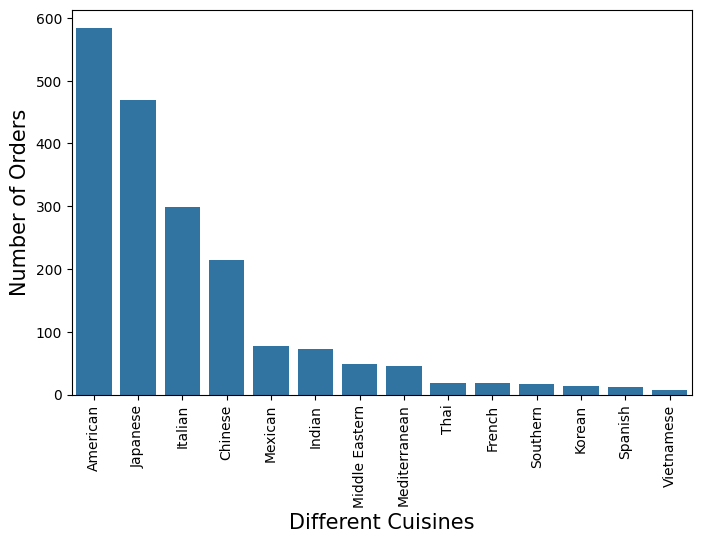

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.xlabel('Different Cuisines', size=15)
plt.ylabel('Number of Orders', size=15)
plt.xticks(rotation=90)
plt.show()

Observations:

As we can see in the plot, we have 3 main blocks of preferences
*   American, Japanese, Italian and Chines cuisine types are the top 4
*   The second block on preference are the Mexican, Indian, Middle Eastern and Mediterranean
*   The last block considers the rest of the cuisine types such as Thai, French, Sourthern, Korean, Spanish and Vietnamese




In [37]:
#I will add a new column for the week day as categories
df['is_weekday'] = df.day_of_the_week.map({'Weekday':1, 'Weekend':0})

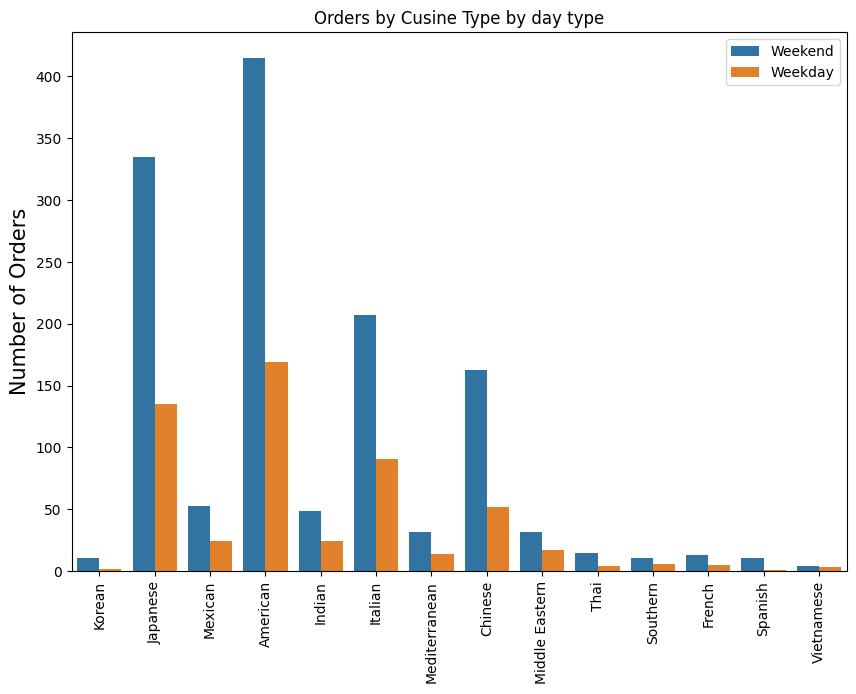

In [38]:
# What is the distruttion of the cost of the orders by cuisine type?
plt.figure(figsize=(10,7))
plt.title('Orders by Cusine Type by day type')
sns.countplot(data=df, x='cuisine_type',hue='is_weekday')
plt.xlabel('', size=15)
plt.ylabel('Number of Orders', size=15)
plt.xticks(rotation=90)
plt.legend(labels=['Weekend','Weekday'])
plt.show()

Observations
*   As we can see, in the majority of the cuisine types, the number of orders is more than the double during the weekend than during weekdays for the top cuisine types.
*   We cannot see a spike or difference in the distribution of these orders by cuisine and day of the week

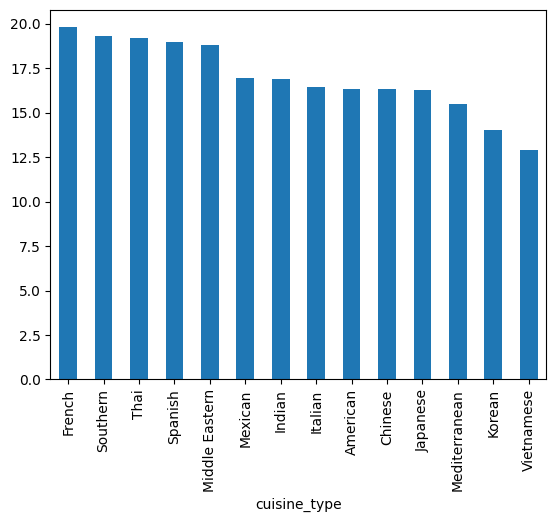

In [39]:
# What is the average ticket cost per cuisine type?
orders_per_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False)
orders_per_cuisine.plot(kind='bar')
plt.show()

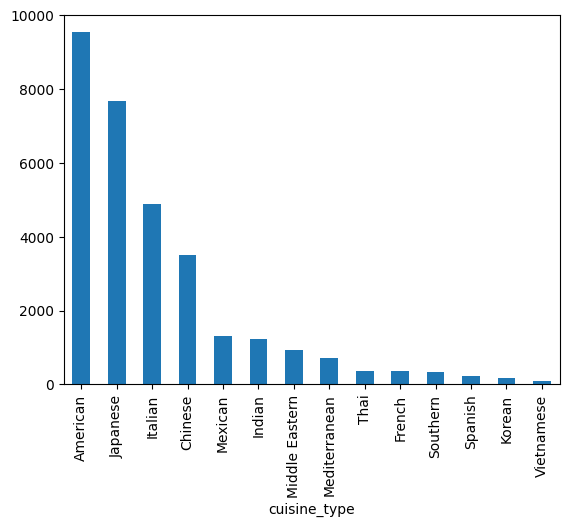

In [40]:
# What is the total amount of sales per cuisine type?
orders_per_cuisine = df.groupby('cuisine_type')['cost_of_the_order'].sum().sort_values(ascending=False)
orders_per_cuisine.plot(kind='bar')
plt.show()

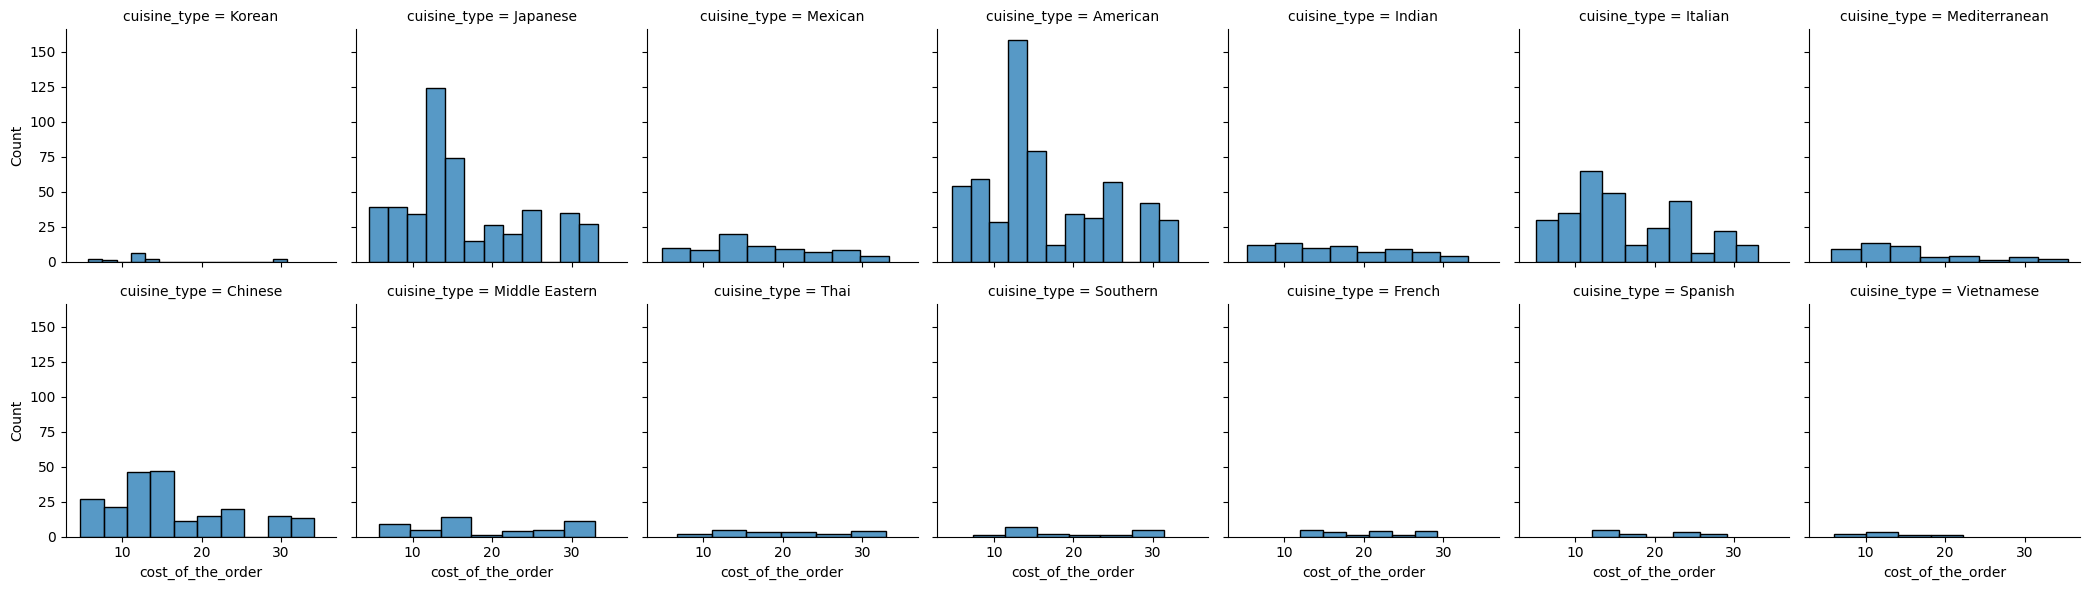

In [41]:
# What is the distrubtion of the cost of the orders by cuisine type?
g = sns.FacetGrid(df, col='cuisine_type', col_wrap=7)
g.map(sns.histplot,'cost_of_the_order')

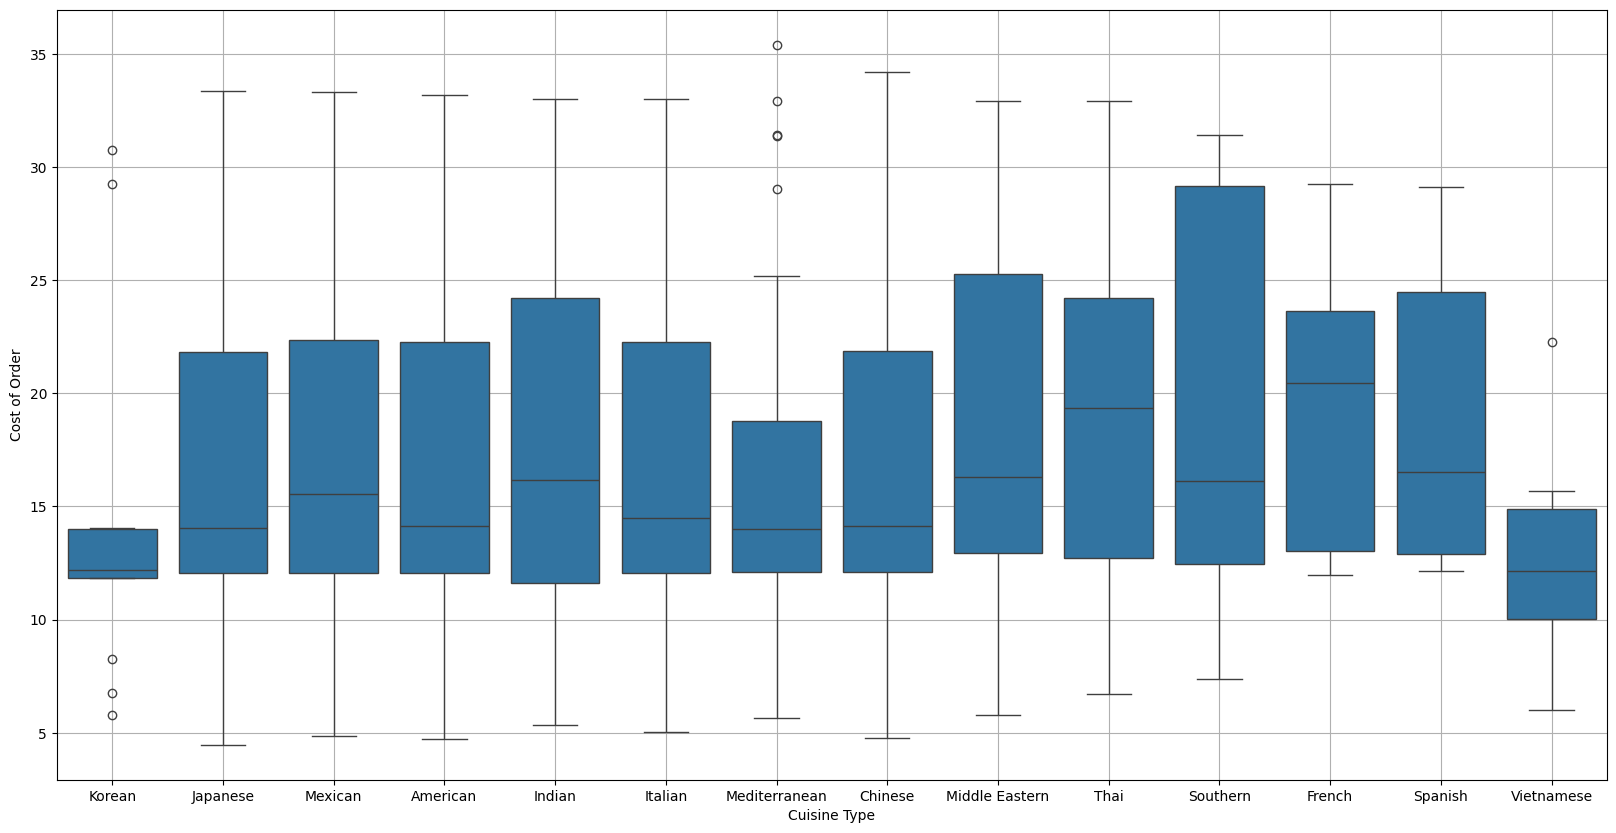

In [42]:
plt.figure(figsize = (20, 10))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.ylabel('Cost of Order')
plt.xlabel('Cuisine Type')
plt.grid()
plt.show()

Observations
I did distinct using distinct views of the cost of the order feature, here some findings
*   The cuisines French, Souther, Thai, Spanish, and Middle Eastern are the top 5 based on the mean of the order cost.
*   American food is in the position 9th based on the mean of the cost by order
*   Due to the volumen of orders received by the top 5 cuisine types, the total amount of sells is according the number of orders received being the American, Japanese, Italian, Chinese and Mexican the top 5 on total amount of sales (same as number of orders received)
*   Based on the histograms by cuisine_type, we can see that in general in all the cuisine types, the majority of the orders are around 12 to 17 usd by order
*   The indian cuisine has a almost uniform distribution in the order costs between 5 and 35
*   Chinese and Middle Easter has a little spike in the right side of the distribution over 30 usd per order
*   in the boxplots we can see the following
**   The median of the French and Thai cuisine are the higher of all the cusines
**   The median of the cuisines Vietnamese, Korean, Japanese, American and Mediterran are on the lower levels of all the cuisines. Lower than 15 USD

<Axes: >

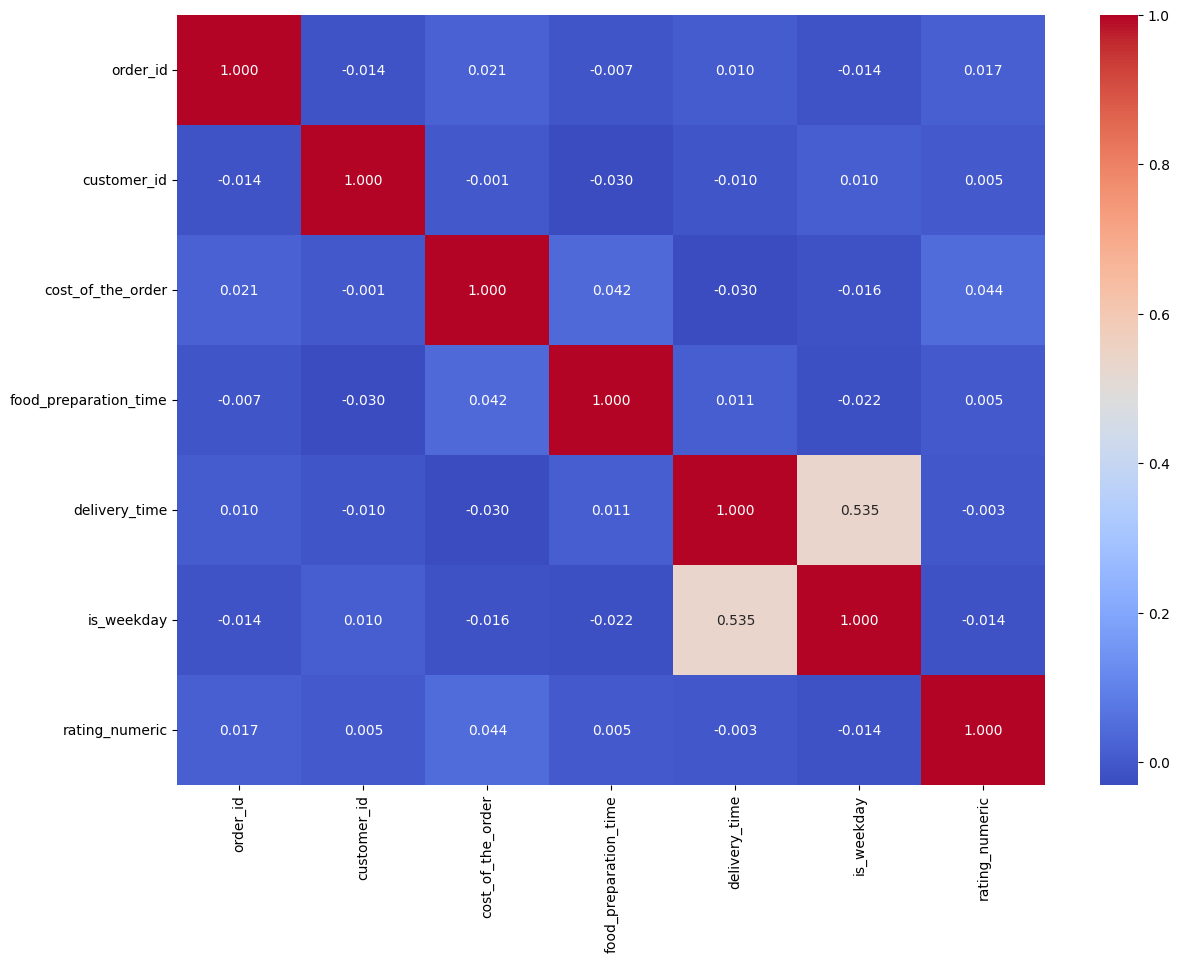

In [43]:
df_corr = df[['order_id', 'customer_id','cost_of_the_order', 'food_preparation_time','delivery_time','is_weekday', 'rating_numeric']]
corr = df_corr.corr()
plt.figure(figsize = (14, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
        fmt = ".3f",
        xticklabels = corr.columns,
        yticklabels = corr.columns)

Observations
*   We can see a moderate correlation between delivery_time and the day of the week
*   The rest of he features has a weak correlation between them

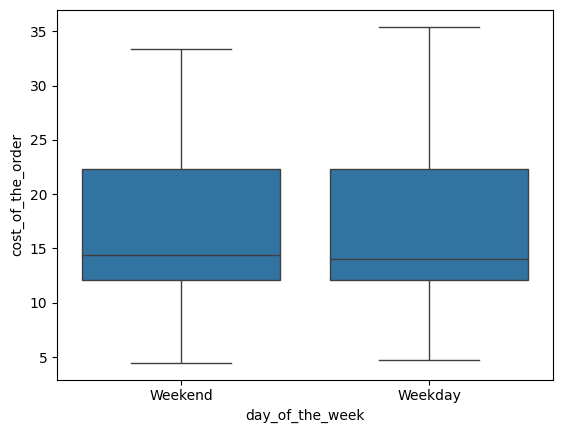

In [44]:
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.show()

This is interesting, the cost of the orders is almost identical independently of the day of the week. That means that the orders are very similar at any day

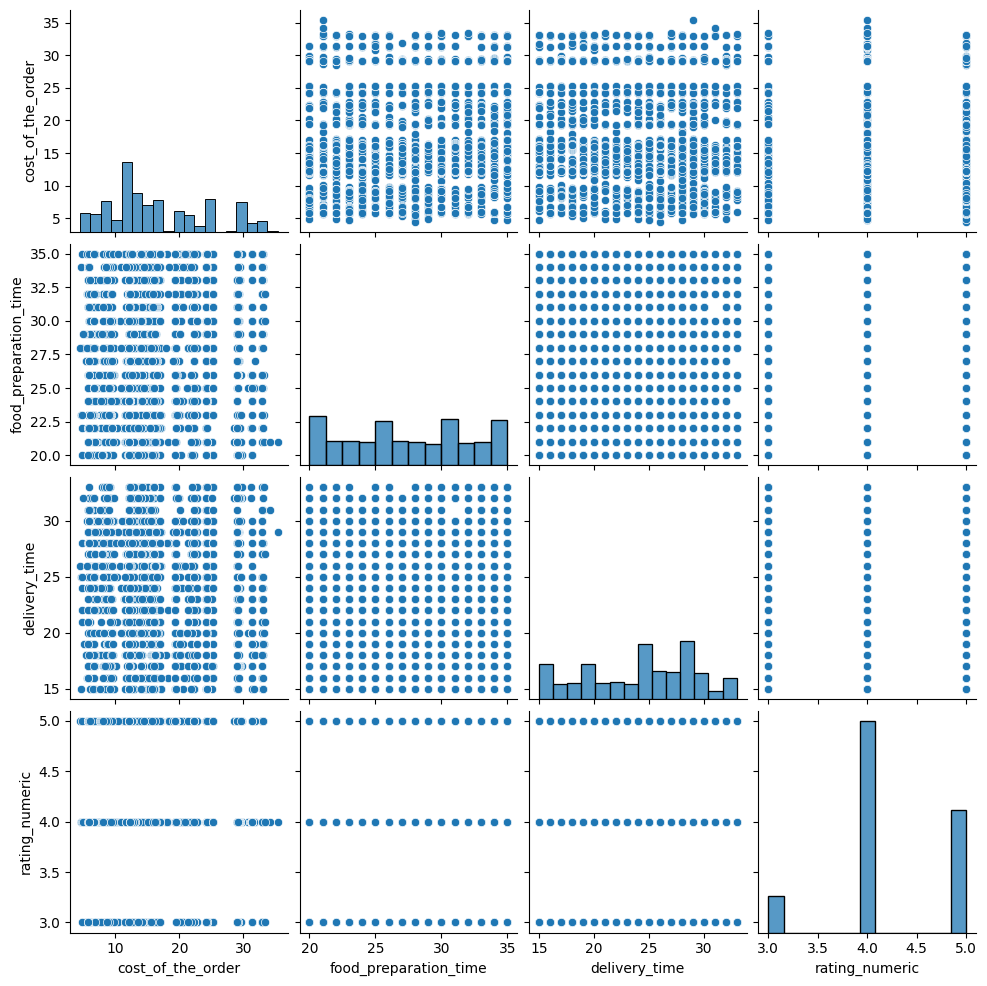

In [45]:
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating_numeric']])
plt.show()

Observations
*    The relation between delivery food and food preparation time is almost uniform
*    There is no influence between ratings and the delivery/prepration time

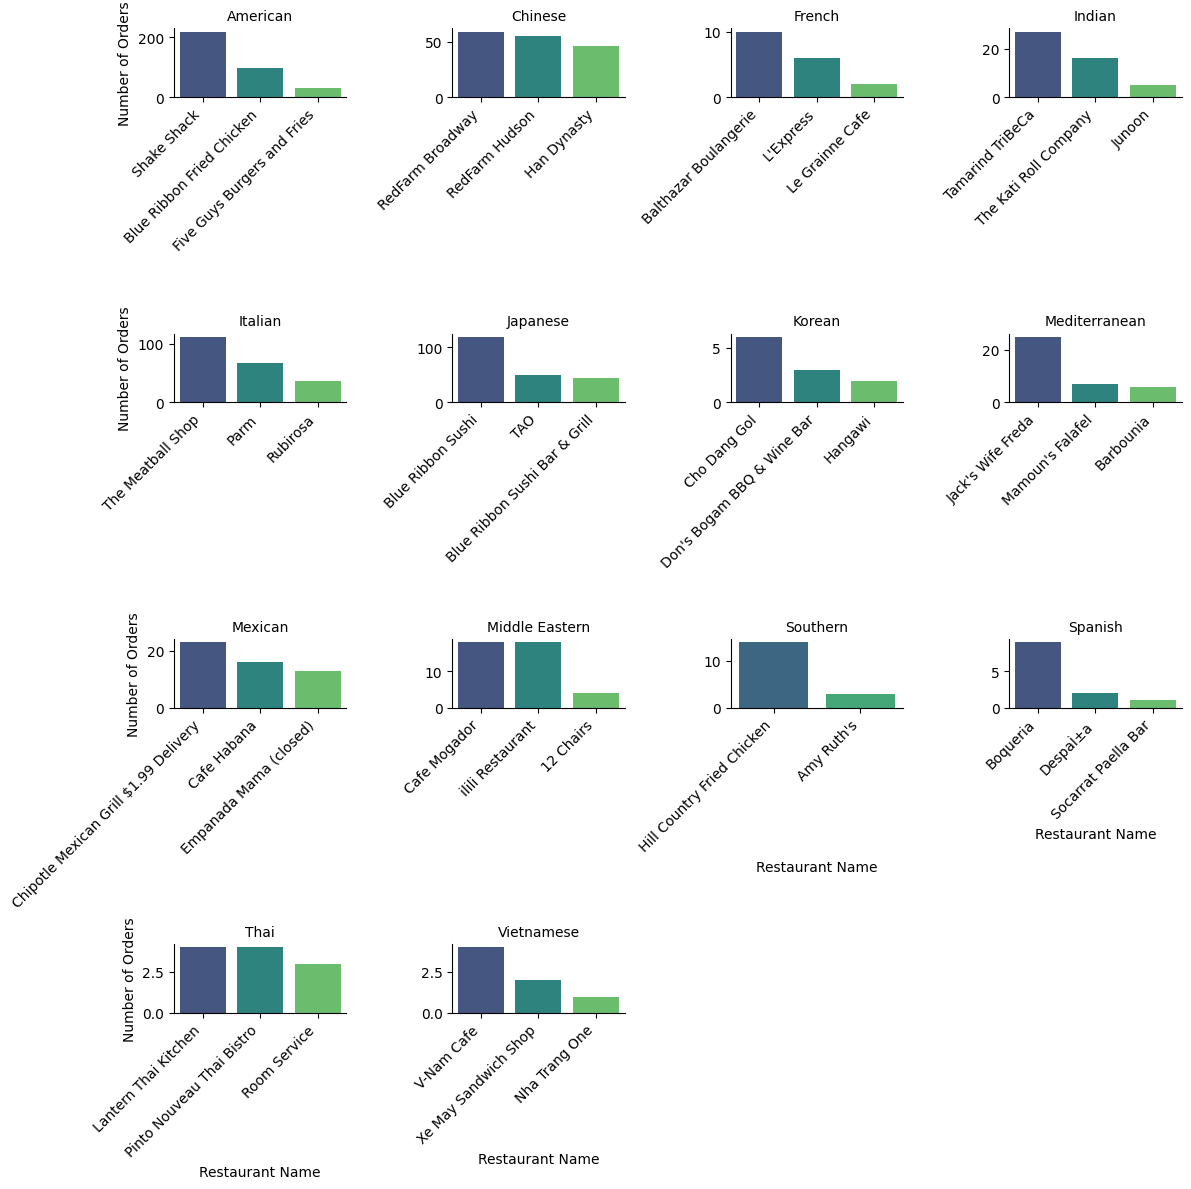

In [46]:
# Calculate the number of orders per restaurant per cuisine type
order_counts = df.groupby(['cuisine_type', 'restaurant_name']).size().reset_index(name='order_count')

# Get the top 3 restaurants for each cuisine type
top_restaurants = order_counts.groupby('cuisine_type').apply(lambda x: x.nlargest(3, 'order_count')).reset_index(drop=True)

# Plotting the results using seaborn's FacetGrid
g = sns.FacetGrid(top_restaurants, col="cuisine_type", col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x="restaurant_name", y="order_count", palette="viridis")
g.set_axis_labels("Restaurant Name", "Number of Orders")
g.set_titles("{col_name}")

# Rotate x-axis labels for better readability
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

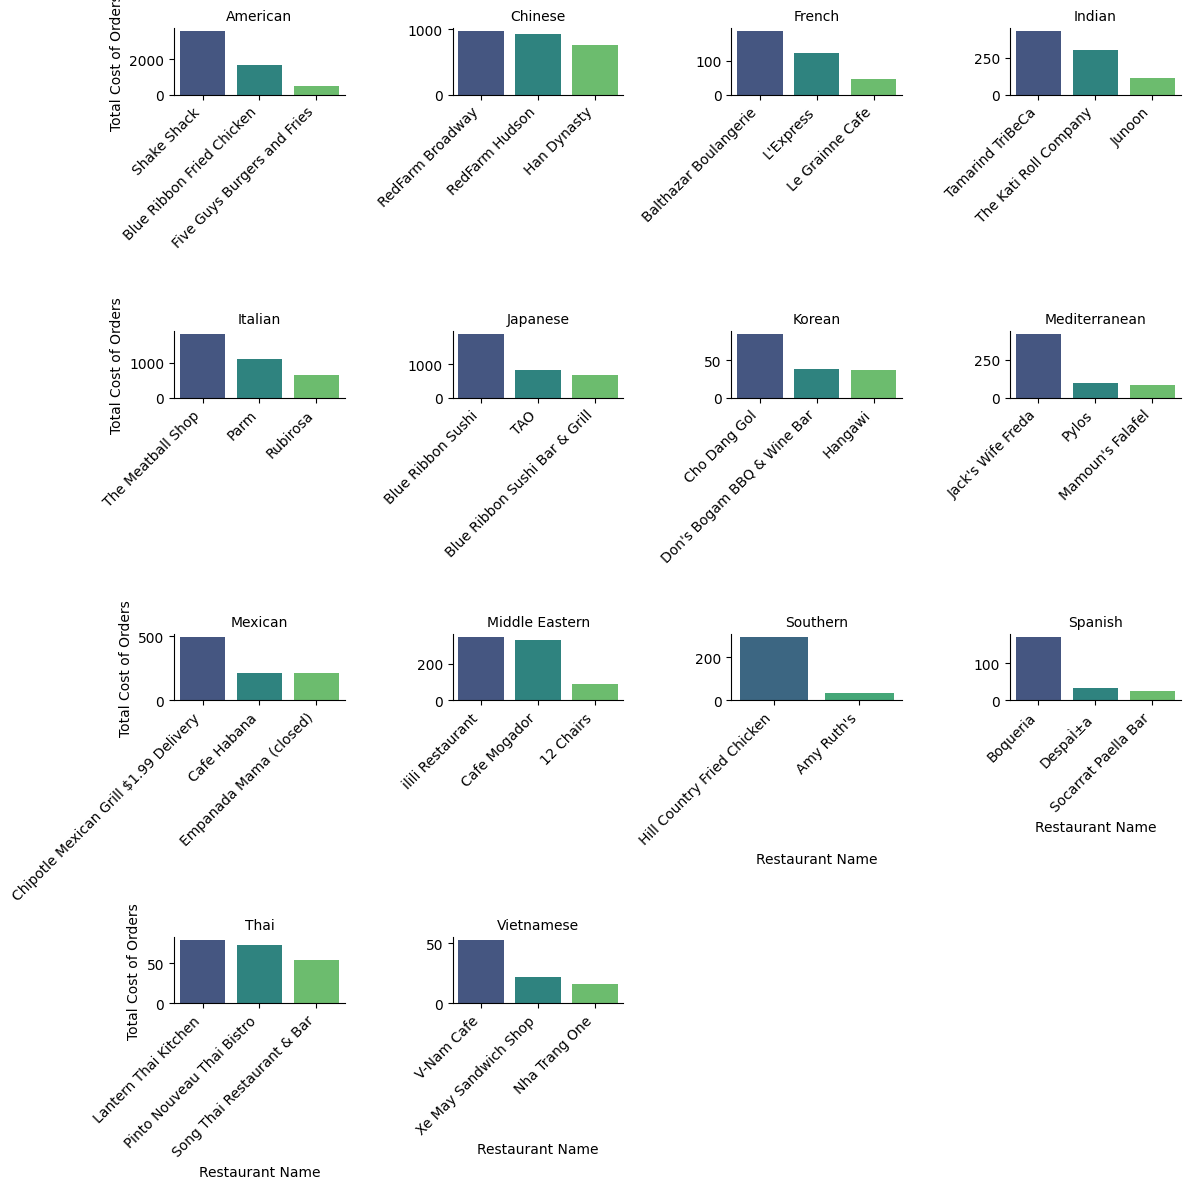

In [47]:
order_sums = df.groupby(['cuisine_type', 'restaurant_name'])['cost_of_the_order'].sum().reset_index()

# Get the top 3 restaurants for each cuisine type based on the total order cost
top_restaurants = order_sums.groupby('cuisine_type').apply(lambda x: x.nlargest(3, 'cost_of_the_order')).reset_index(drop=True)

# Plotting the results using seaborn's FacetGrid
g = sns.FacetGrid(top_restaurants, col="cuisine_type", col_wrap=4, sharex=False, sharey=False)
g.map_dataframe(sns.barplot, x="restaurant_name", y="cost_of_the_order", palette="viridis")
g.set_axis_labels("Restaurant Name", "Total Cost of Orders")
g.set_titles("{col_name}")

# Rotate x-axis labels for better readability
for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

Observations
*   We identified the top 3 restaurants based on the number of orders received and the amount of sells by cusine type
*   I do not see any outstanding here, the restaurants that receved the majority of the orders are the same that have the best sells by cuusine type

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [48]:
restaurant_rating_count = df.groupby('restaurant_name')['rating_numeric'].count().reset_index()

# Filter restaurants with rating count > 50
filtered_restaurants = restaurant_rating_count[restaurant_rating_count['rating_numeric'] > 50]
for index, row in filtered_restaurants.iterrows():
   meanByRest = df[df['restaurant_name']==row['restaurant_name']]['rating_numeric'].mean()
   if meanByRest >= 4:
      print(f"Restaurant Name: {row['restaurant_name']} rating avg: {round(meanByRest,2)}")



Restaurant Name: Blue Ribbon Fried Chicken rating avg: 4.22
Restaurant Name: Blue Ribbon Sushi rating avg: 4.13
Restaurant Name: Parm rating avg: 4.07
Restaurant Name: RedFarm Broadway rating avg: 4.17
Restaurant Name: RedFarm Hudson rating avg: 4.11
Restaurant Name: Shake Shack rating avg: 4.17
Restaurant Name: The Meatball Shop rating avg: 4.33


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [49]:
def calculate_revenue(total_amount, percentage):
  partial = total_amount * percentage
  partial = partial / 100
  return partial

In [50]:
# Write the code here
total_sales_20 = df.loc[df['cost_of_the_order'] > 20, 'cost_of_the_order'].sum()
print(f'The total sales of tickets greater than 20 dollars is: {total_sales_20:.2f}')
revenue_20 = calculate_revenue(total_sales_20,25)
print(f'The Company Revenue of this part is: {revenue_20:.2f}')

The total sales of tickets greater than 20 dollars is: 14754.91
The Company Revenue of this part is: 3688.73


In [51]:
total_sales_5 = df.loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] < 20), 'cost_of_the_order'].sum()
print(f'The total sales of tickets greater than 20 dollars is: {total_sales_5:.2f}')
revenue_5 = calculate_revenue(total_sales_5,15)
print(f'The Company Revenue of this part is: {revenue_5:.2f}')

The total sales of tickets greater than 20 dollars is: 16517.17
The Company Revenue of this part is: 2477.58


In [52]:
Total_revenue = revenue_20 + revenue_5
print(f'Total Revenue for the company: {Total_revenue:.2f}')

Total Revenue for the company: 6166.30


#### Observations:
The total amount of sales for tickets with cost greater than 20 dollars is:<br> **14,754.91**<br>
The 25% of this amount is : <br>
**3,688.73**<br>
The total amount of sales for tickets with cost greater than 5 dollars but lower than 20 dollars is<br>
**16,517.17**<br>
The 15% of this amount is:<br>
**2,477.58**<br>
The Total Net Revenue for the company is:<br>
**6,166.30**

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [53]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
orders_60 = df[df['total_time'] > 60]
total_percentage_60 = (orders_60.shape[0] / df.shape[0]) * 100
print(f'Total number of orders that takes more than 60 mins :{orders_60.shape[0]}')
print(f'Total number or orders :{df.shape[0]}')
print(f'The percentage of orders that takes more than 60 minutes: {total_percentage_60:.2f}%')


Total number of orders that takes more than 60 mins :200
Total number or orders :1898
The percentage of orders that takes more than 60 minutes: 10.54%


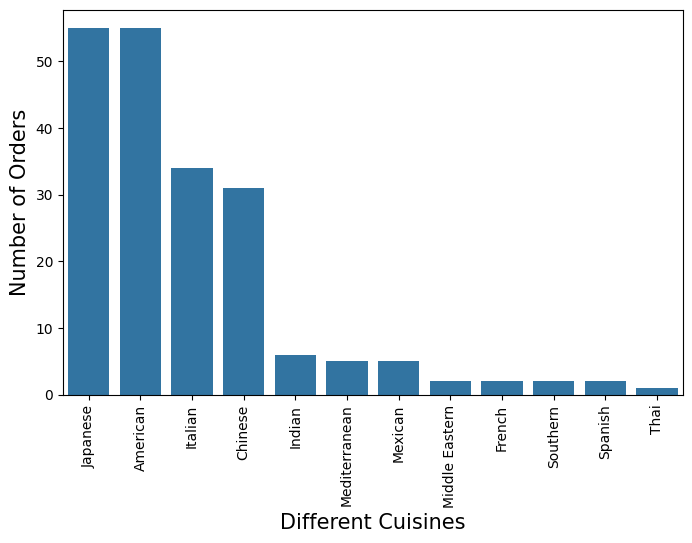

In [54]:
# What cousine type takes longer to Prepare && Deliver
plt.figure(figsize=(8,5))
sns.countplot(data=orders_60, x='cuisine_type', order=orders_60['cuisine_type'].value_counts().index)
plt.xlabel('Different Cuisines', size=15)
plt.ylabel('Number of Orders', size=15)
plt.xticks(rotation=90)
plt.show()

In [55]:
order=orders_60['cuisine_type'].value_counts()
order

cuisine_type
Japanese          55
American          55
Italian           34
Chinese           31
Indian             6
Mediterranean      5
Mexican            5
Middle Eastern     2
French             2
Southern           2
Spanish            2
Thai               1
Name: count, dtype: int64

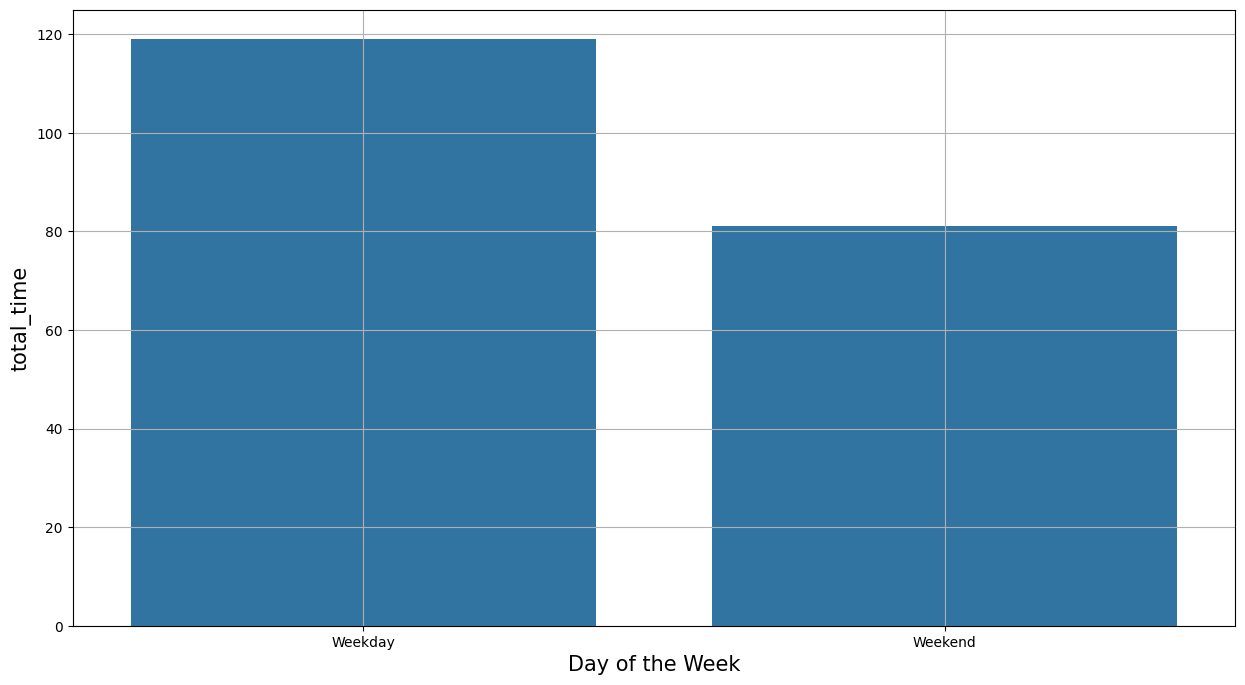

In [56]:
plt.figure(figsize=(15,8))
sns.countplot(data=orders_60, x='day_of_the_week')
plt.xlabel('Day of the Week', size=15)
plt.ylabel('total_time', size=15)
plt.grid()
plt.show()

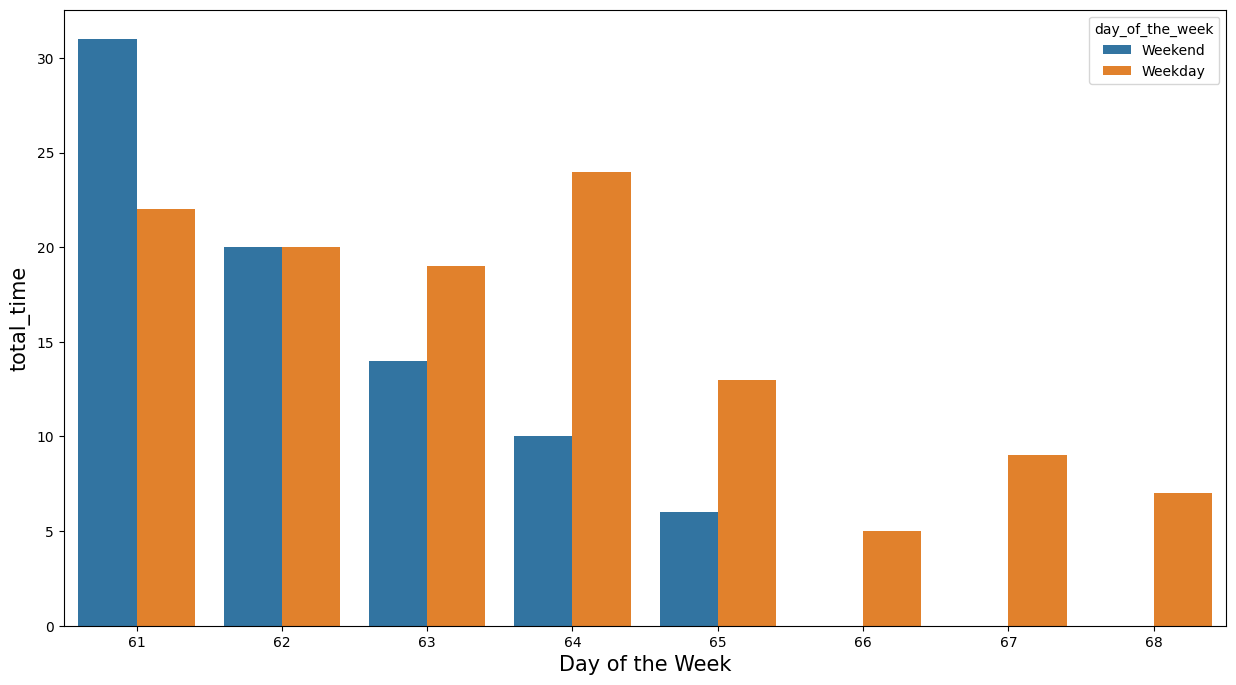

In [57]:
plt.figure(figsize=(15,8))
sns.countplot(data=orders_60, x='total_time', hue='day_of_the_week')
plt.xlabel('Day of the Week', size=15)
plt.ylabel('total_time', size=15)
#plt.xticks(rotation=90)
plt.show()

In [58]:
# Group by 'restaurant_name' and count the occurrences
restaurant_counts = orders_60.groupby('restaurant_name').size().reset_index(name='count')
sorted = restaurant_counts.sort_values(by=['count'], ascending=False)
# Display the result
sorted.head()

,restaurant_name,count
55,Shake Shack,26
8,Blue Ribbon Sushi,19
66,The Meatball Shop,13
48,RedFarm Broadway,8
46,Parm,6


#### Observations:
We have in total **200 Orders** that takes more than **60 minutes** to deliver.
<br>
* There is a bigger number of orders that took longer than 60 minutes during the weekdays
* The Top 5 Cuisine Types of these orders are
  * American
  * Japanese
  * Italian
  * Chinese
  * Mexican

These Cuisines are the Top Cuisines in the number of orders received

* The restaurants with the biggest number of orders with more than 60 minutes:
  * Shake Shack: **26 Orders**
  * Blue Ribbon Sushi: **19 Orders**
  * The Meatball Shop: **13 Orders**
  * Redfarm Broadway: **8 Orders**
  * Parm : **6 Orders**

4 of these Restaurants part of the Top restaurants by number of orders received.

**119 orders** were on weekday
**81 orders** were on weekends

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [59]:
delivery_weekend = round(df[df['day_of_the_week']=='Weekend']['delivery_time'].mean(),2)
delivery_weekday = round(df[df['day_of_the_week']=='Weekday']['delivery_time'].mean(),2)
delivery_weekend,delivery_weekday

(22.47, 28.34)

#### Observations:
As we can see in these 2 tables<br>
Mean Delivery Time during Weekdays: **28.34**<br>
Mean Delivery Time during Weekend:  **22.47**<br>
<br>
During the weekends the delivery time decreased aprox **6 minutes** around **25%** compared with the Weekdays
<br>
A possible reason could be related with the wekdays traffic congestion, on weekdays people is in the street due to work/business and during weekends usually the traffic decrease

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  The preferred Cuisine Types by orders are during weekdays or weekends
  * American
  * Japanese
  * Italian
  * Chinese
  * Mexican
* Orders Behavior
  * 71% of the orders are placed on weekends and only 29% during the weekdays.
    * This could be due to the fact that during the weekends people tend to buy food instead of spend time cooking
* Orders by Customers
  * Only 2 customers has 10 or more orders placed
  * Around 50% of the customers has less than 3 orders placed
  * The mean number of orders per customer is 1.5
* Ticket cost
  * The average ticket cost is 16.49 USD
  * The average ticket cost of the Cuisine types French, Souther, Thai, Spanish, Middle eastern is higher than 17 USD
* Company Revenue
  * 29.24% of the orders has a ticket cost higher than 20 dolars, which generates a revenue for the company of  3,688.73 USD
  * The total Revenue for the company is  6,166.30 USD
* Ratings provided
  * 38% of the orders are not rated
* Delivery time / Food preparation time
  * The Food preparation time during weekdays and weekends is the same. So, the restaurants are not exceeding the time in the kitchen to prepare the food
  * The deliver time is 25% faster (aprox 6 minutes) during the weekends compared with the weekdays
  * 200 Orders that represents 10.54% of the total number of orders took more than 60 minutes fromt he moment that the restaurant received the order until the moment it was delivered
    * 199 of them  during weekday
    * 81 of then during weekend
    * Japanese and American Cuisines has 55 orders each that exceed the 60 minutes timeline. This is the 55% of the total orders that took longer than 60 minutes
    * The top 3 restaurants that exceed this 60 minutes timeline
      * Shake Shack
      * Blue Ribbon Sushi
      * The Meatball Shop
      <br>Important to mention that these 3 restaurants are part of the the top restaurants as mentioned before

### Recommendations:

Based on the analysis we did of the top 3 resturants by number of orders receive and total amount of sales, the company should identify a way to increase the engagement of these restaurants to increase the sales

The Average ticket of the Cuisine types French, Southern, Thai, Spanish, Middle Eastern is 17USD, a little bit higher than the overall ticket cost average. So this could be an interesting opportunity area to analyze those restaurants/Cuisine type and create incentives for the customers to buy more on them because the company get a higher revenue part for tickets over 20USD cost

The top restaurants in sales and number of orders received are not the best in the average sales by ticket, the company should analyze how to work with these companies to increase the average sale by ticket that currently is 16.45 by order, so if we can encourage the users to spend 2 usd more on each order, we can increase the sales in 15%.  

The company should look to increase the average number of orders placed by users, currently only 2 users has 10 of more orders placed and the current average number of orders per users is 1.5
* Increasing the average in only 1 ticket per customer, will generate an additional revenue for the company of: 2,968 USD which is a 48% increase in revenue for the company
    * Unique Users: 1200
    * Average ticket cost 16.49 USD
    * 15% of revenue for tickets under 20 USD: 2,968 USD  

The difference on the number of orders placed during weekdays and weekends is huge, the company should do additional research to increase the number of orders during the weekdays or create different incentives in partnership with the top 3 restaurants by cuisine type to impulse the sales during the weekdays
  * Maybe a voucher campaign with a discount if the customers buy food during weekdays

Since the mean of Food preparation time is almost identical (27 minutes) during Weekdays and Weekends, that means that the increase of the time to deliver the food during the weekdays is on cause on the delivery part, the company should review the root cause of it
  * Is it caused because the company do not have enough deliver guys during the weekdays?
  * Is it a related to the traffic in the city? We do not have information about the miles between the restaurant and the place where to deliver to review if the time increase for similar distances or maybe is an issue of the time when the orders are placed we do not have timestamps of these orders
  * The number of orders is much lower during the weekdays than the weekends, and the kitchen is no taking longet to prepare the food, so there is a possible issue with the delivery team that must be analyzed deeper

The company should review the source of this data and identify if is possible to enrich it, for example including columns like
  * Order timestamp: This can help to do deeper analysis of the specific day of the week and time when the order was created
  * Distance between the restaurant and the delivery place: This can help to do better analysis if the traffic could be a reason of the increase on the delivery time
  * Deliver_id: or some ID to identify who is doing the delivery, this can help to review the workload per delivery person and time consumed on each delivery


Something that I think is important to keep in mind, is that in this exercise, we impute the ratings (around 40% of the values in the dataset were imputed)using the mean based on the cuisine type. We didn't identify any correlation between the ratings and any other variable, but still, it is important to encourage the users to provide it as much as possible because that can help in this analysis
*  Are the top restaurants the best ranked by the users?
*  What restaurants are the organic best ranked by the users?
*  Is it possible to increase the sales in the best ranked restaurants?
*  What if the company create a campaing to encourage the users to rank each order using a voucher/coupon/discount to be used during the weekdays? That will increase the sales in those days where the sales are low.